In [7]:
import random
def random_rotation(image, max_angle=35):
    """
    Rotate the image by a random angle and fill the background with the rightmost pixel color.

    Parameters:
    - image: PIL Image object
    - max_angle: Maximum rotation angle in degrees (default is 30 degrees)

    Returns:
    - Rotated PIL Image object with a filled background
    """
    # Generate a random angle within the specified range
    angle = random.uniform(-max_angle, max_angle)
    
    # Rotate the image
    rotated_image = image.rotate(angle, fillcolor=image.getpixel((image.size[0]-1, 0)))
    
    return rotated_image


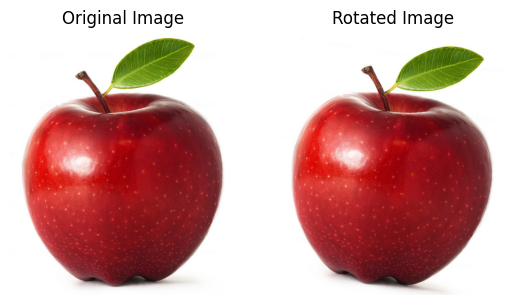

In [8]:
# Example Usage
from PIL import Image
import matplotlib.pyplot as plt  # For visualization

# Load your image


image_path = "data/apple/apple_1.jpg"
original_image = Image.open(image_path)

# Apply random rotation
rotated_image = random_rotation(original_image)

# Display the original and rotated images for comparison
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_image)
plt.axis("off")

plt.show()


In [9]:
import os

def save_rotated_images(folder, image_path,image_order, num_rotations=5):
    # Create a new folder for rotated images
    rotation_folder = os.path.join(folder, "rotation")
    os.makedirs(rotation_folder, exist_ok=True)
    
    # Load the original image
    original_image = Image.open(image_path)
    
    # Apply rotation augmentations and save the images
    for i in range(1,num_rotations+1):
        # Apply random rotation
        rotated_image = random_rotation(original_image)
        rotated_image = rotated_image.convert("RGB")

        # Save the rotated image
        rotated_image_path = os.path.join(rotation_folder, f"{image_order}_rotated_{i}.jpg")

        rotated_image.save(rotated_image_path)

In [10]:
fruits = ["apple", "banana", "carrot", "cherry", "coconut", "cucumber", "grapefruit", "kiwi",
    "melon", "pear", "pineapple", "plum", "tomato", "watermelon"]

In [11]:
import os

def count_images_in_folder(folder_path, image_extensions=['.jpg', '.jpeg', '.png', '.gif', '.bmp']):
    image_count = 0

    # Check if the folder exists
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # List all files in the folder
        files = os.listdir(folder_path)

        # Count the image files
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    else:
        print(f"The folder {folder_path} does not exist.")

    return image_count

In [12]:
for fruit in fruits:
    # Path to the folder containing the images
    folder_path = f"data/{fruit}"

    # Count the number of images in the folder
    count = count_images_in_folder(folder_path)

    for i in range(1, count+1):
        image_path = f"data/{fruit}/{fruit}_{i}.jpg"
        save_rotated_images(folder_path, image_path, num_rotations=10, image_order=i)